In [16]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',                  
                  include_top=False,                 
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
import os
os.getcwd()
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Lab # 9')
!ls

 cat_and_dog		     'CNN(image).ipynb'		 models
 cat.png		     'Data augmentation.ipynb'	 validation
 cats_and_dogs_small_2.html   dog.png			 VGG16.ipynb


In [0]:
from keras import models
from keras import layers

model = models.Sequential() 
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    elif set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)
# Note that the validation data should not be augmented! 
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(        
            # This is the target directory        
            'cat_and_dog',       
            # All images will be resized to 150x150        
            target_size=(150, 150),        
            batch_size=32,        
            # Since we use binary_crossentropy loss, we need binary labels        
            class_mode='binary')

validation_generator = test_datagen.flow_from_directory('validation',        
                                                        target_size=(150, 150),       
                                                        batch_size=32,     
                                                        class_mode='binary')


Found 142 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


In [23]:

history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=10,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/10
100/100 [==============================] - 88s 878ms/step - loss: 0.0607 - acc: 0.9875 - val_loss: 1.5540e-05 - val_acc: 1.0000
Epoch 2/10
100/100 [==============================] - 33s 329ms/step - loss: 9.9192e-05 - acc: 1.0000 - val_loss: 2.1543e-07 - val_acc: 1.0000
Epoch 3/10
100/100 [==============================] - 33s 329ms/step - loss: 4.8967e-06 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 4/10
100/100 [==============================] - 33s 329ms/step - loss: 6.5032e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 5/10
100/100 [==============================] - 33s 330ms/step - loss: 1.6343e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 6/10
100/100 [==============================] - 33s 333ms/step - loss: 1.3883e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 7/10
100/100 [==============================] - 33s 334ms/step - loss: 1.2415e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epo

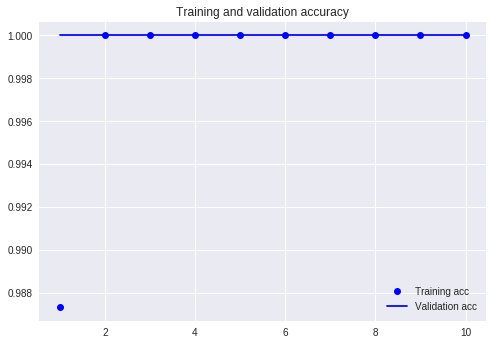

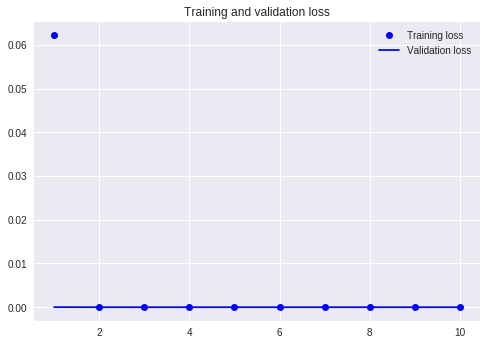

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()


In [0]:
ls

gdrive/  sample_data/


In [0]:
pwd

'/content'